# Spotify Dataset Exploratory Data Analysis

In [ ]:
!pip install kaggle


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d dhruvjyotiswain/spotify2016popularsongs

  0% 0.00/97.7k [00:00<?, ?B/s]
100% 97.7k/97.7k [00:00<00:00, 72.7MB/s]


In [ ]:
!unzip spotify2016popularsongs.zip

Archive:  spotify2016popularsongs.zip
  inflating: data.csv                


## Importing wanted libraries

In [ ]:
# Importing wanted libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
sns.set_style("darkgrid")

# Load the dataset
df = pd.read_csv("/content/data.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()


,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4,0.904,1,Parallel Lines,Junior Boys


## Data Cleaning

In [ ]:
# Data Cleaning

# Check for missing values
missing_values = df.isna().sum()
print("Missing Values:")
print(missing_values)








Missing Values:
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64


In [ ]:

# Display information about the DataFrame
df_info = df.info()
print("DataFrame Info:")
print(df_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   int64  
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(9), int64(5), object(2)
memory 

In [ ]:
# Display the shape of the DataFrame
df_shape = df.shape
print("DataFrame Shape:")
print(df_shape)


DataFrame Shape:
(2017, 16)


In [ ]:
# Display the columns of the DataFrame
df_columns = df.columns
print("DataFrame Columns:")
print(df_columns)

DataFrame Columns:
Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')


In [ ]:
# Display summary statistics of the DataFrame
df_describe = df.describe()
print("DataFrame Summary Statistics:")
print(df_describe)

DataFrame Summary Statistics:
       acousticness  danceability   duration_ms       energy  \
count   2017.000000   2017.000000  2.017000e+03  2017.000000   
mean       0.187590      0.618422  2.463062e+05     0.681577   
std        0.259989      0.161029  8.198181e+04     0.210273   
min        0.000003      0.122000  1.604200e+04     0.014800   
25%        0.009630      0.514000  2.000150e+05     0.563000   
50%        0.063300      0.631000  2.292610e+05     0.715000   
75%        0.265000      0.738000  2.703330e+05     0.846000   
max        0.995000      0.984000  1.004627e+06     0.998000   

       instrumentalness          key     liveness     loudness         mode  \
count       2017.000000  2017.000000  2017.000000  2017.000000  2017.000000   
mean           0.133286     5.342588     0.190844    -7.085624     0.612295   
std            0.273162     3.648240     0.155453     3.761684     0.487347   
min            0.000000     0.000000     0.018800   -33.097000     0.000000  

## Data Analysis

### Top 5 most popular artists

Top 5 Most Popular Artists:
Drake              16
Rick Ross          13
Disclosure         12
WALK THE MOON      10
Backstreet Boys    10
Name: artist, dtype: int64


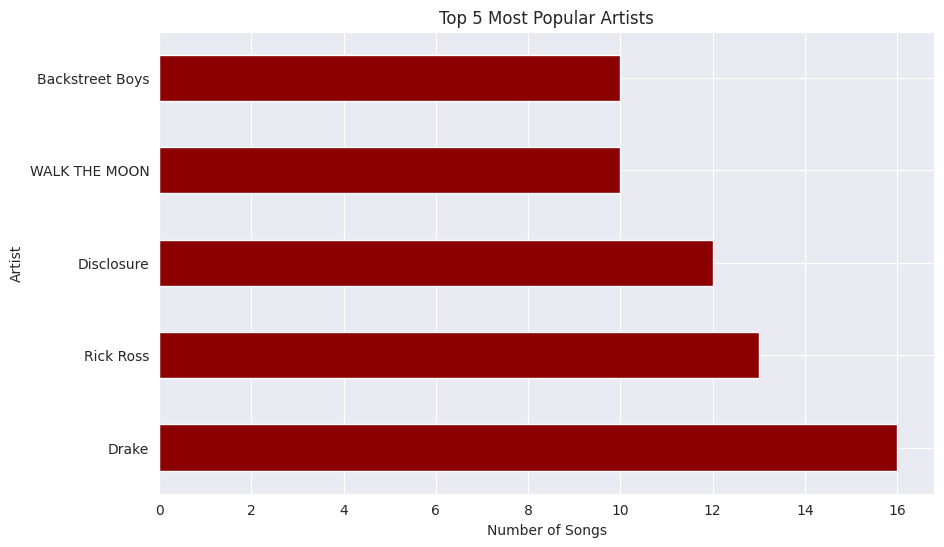

In [ ]:
# Top 5 most popular artists
top_five_artists = df['artist'].value_counts().nlargest(5)
print("Top 5 Most Popular Artists:")
print(top_five_artists)

# Plot a horizontal bar chart for the top 5 artists
plt.figure(figsize=(10, 6))
top_five_artists.plot(kind='barh', color='darkred')
plt.title("Top 5 Most Popular Artists")
plt.xlabel("Number of Songs")
plt.ylabel("Artist")
plt.show()

## Top 10 tracks with most valence

Top 10 Tracks with Most Valence:
      valence                                         song_title
460     0.992                             Abataka - Original Mix
912     0.975                I'm Walkin' - 2002 Digital Remaster
1966    0.974        To Roz Bikini (Itsy, Bitsy, Teenie, Weenie)
48      0.973                              Azon de ma gnin kpevi
207     0.973                                        Look at You
337     0.972  Let's Lovedance Tonight - Danny Krivit Re-edit...
1590    0.972                                   Jelly On A Plate
838     0.971  Let's Lovedance Tonight - Danny Krivit Re-edit...
497     0.968                               Mi Swing es Tropical
72      0.967                                             Spooky


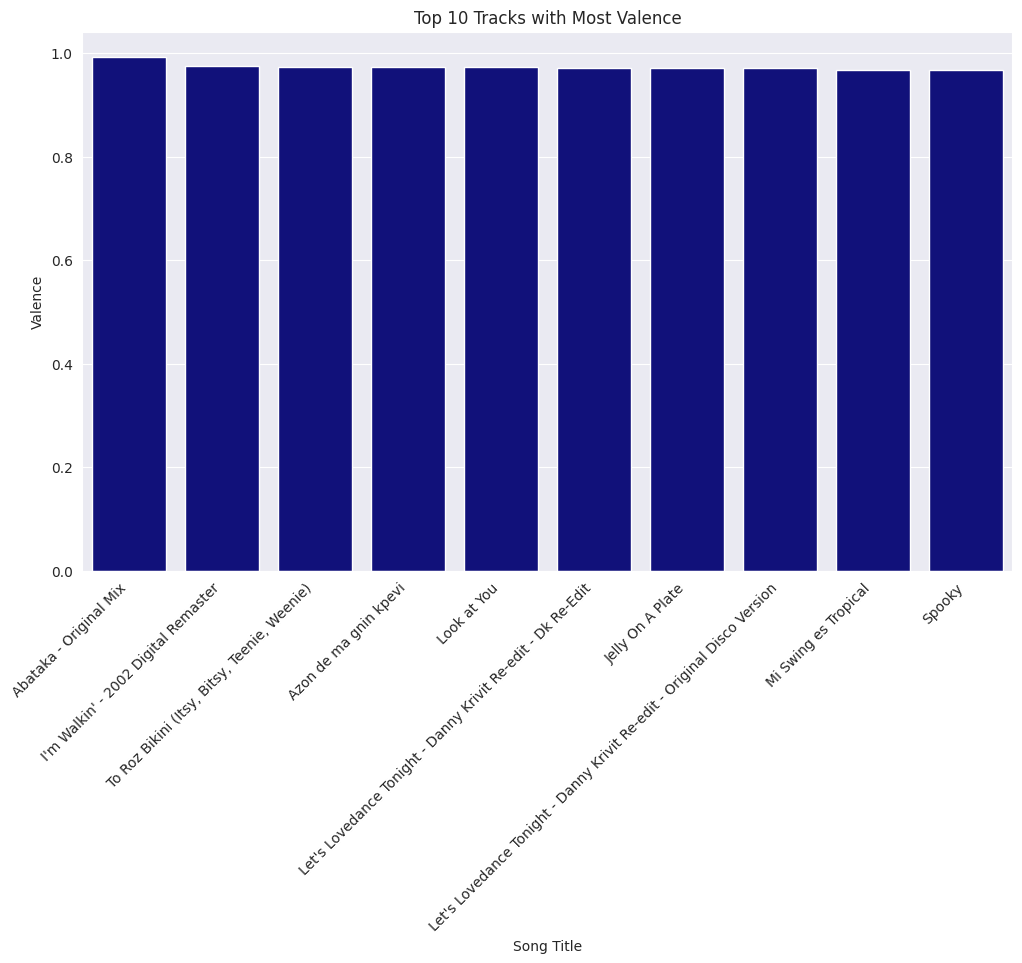

In [ ]:
# Top 10 tracks with most valence
trending_genre = df[['valence', 'song_title']].nlargest(10, 'valence')
print("Top 10 Tracks with Most Valence:")
print(trending_genre)

# Define a color palette
colors = "darkblue"

# Plot a horizontal bar chart for the valence of the top 10 tracks with colorful bars
plt.figure(figsize=(12, 7))
sns.barplot(x="song_title", y="valence", data=trending_genre, color=colors)
plt.title("Top 10 Tracks with Most Valence")
plt.xlabel("Song Title")
plt.ylabel("Valence")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


# Top 10 Loudest Tracks

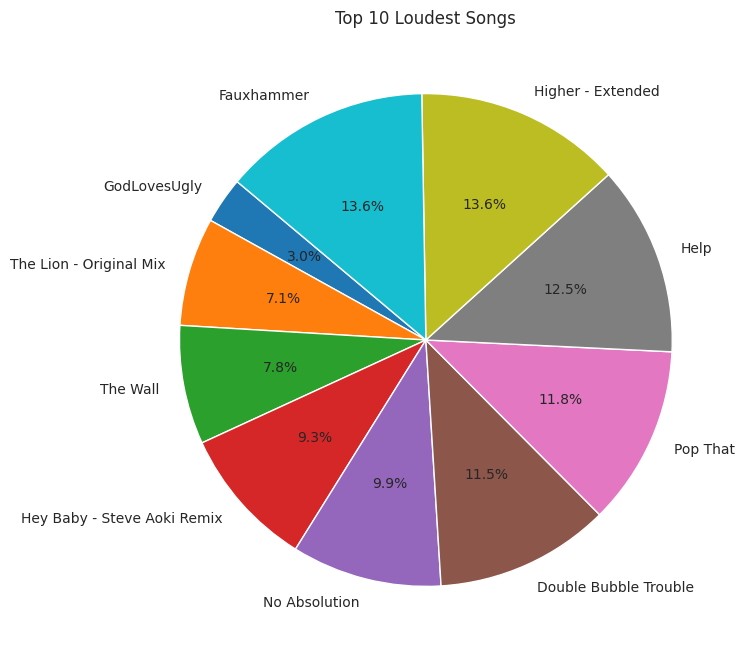

In [ ]:

# Sort the DataFrame by 'loudness' in descending order and select the top 10
top_10_loudest_songs = df.sort_values(by='loudness', ascending=False).head(10)

# Take the absolute value of 'loudness' to ensure non-negative values
top_10_loudest_songs['loudness'] = top_10_loudest_songs['loudness'].abs()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_10_loudest_songs['loudness'], labels=top_10_loudest_songs['song_title'], autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Loudest Songs')
plt.show()

##Top 5 tracks with the longest duration

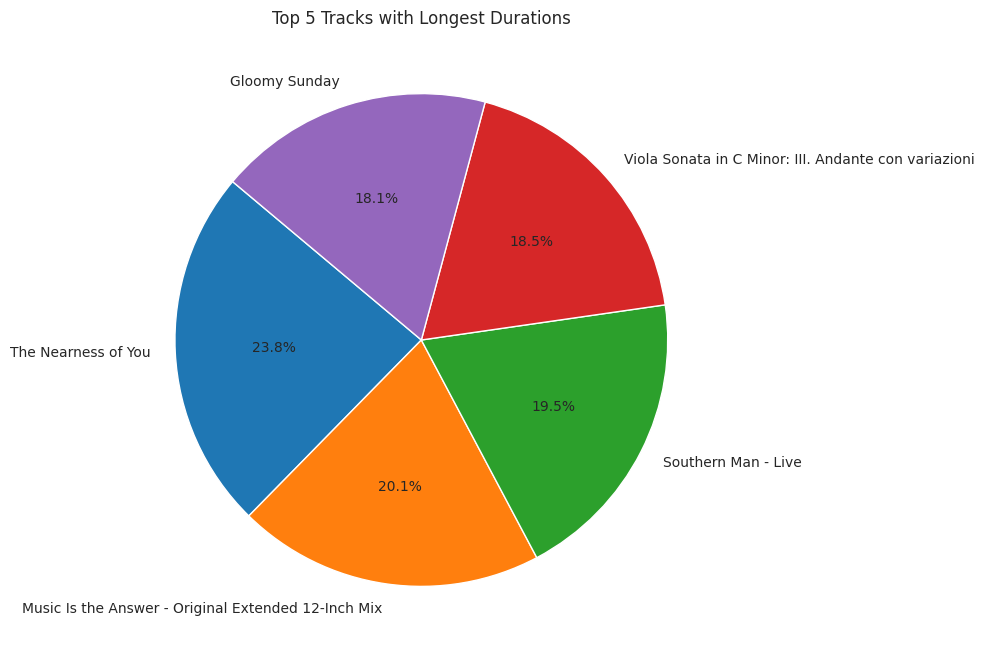

In [ ]:


column_of_interest = 'duration_ms'



# Identify the top 5 tracks with the longest duration
top_5_longest_duration = df.nlargest(5, 'duration_ms')[['song_title', 'duration_ms']]


# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_5_longest_duration[column_of_interest], labels=top_5_longest_duration['song_title'],
        autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Tracks with Longest Durations')
plt.show()


Random Forest:
Best Model Parameters: {'rf__max_depth': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 50}
Cross-Validation Scores: [0.78947368 0.78018576 0.76160991 0.76397516 0.77950311]
Mean CV Accuracy: 0.7749495221429532
Accuracy on Test Set: 0.7821782178217822
Confusion Matrix:
[[158  48]
 [ 40 158]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       206
           1       0.77      0.80      0.78       198

    accuracy                           0.78       404
   macro avg       0.78      0.78      0.78       404
weighted avg       0.78      0.78      0.78       404



Text(120.72222222222221, 0.5, 'True Label')

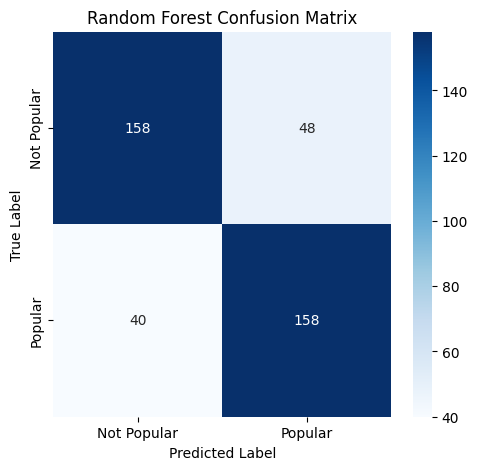

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
import time


# Load the dataset
df = pd.read_csv("/content/data.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)

# Define features (X) and target variable (y)
X = df.drop(['target', 'song_title', 'artist'], axis=1)  # Adjust features accordingly
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construct a pipeline with preprocessing and RandomForestClassifier
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('rf', RandomForestClassifier(random_state=42))
])

# Define the parameter grid for grid search
rf_param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with cross-validation for Random Forest
rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

# Get the best Random Forest model from grid search
best_rf_model = rf_grid_search.best_estimator_

# Cross-validate the best Random Forest model
rf_cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='accuracy')

# Make predictions on the test set using Random Forest
rf_predictions = best_rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
rf_class_report = classification_report(y_test, rf_predictions)

# Print evaluation metrics for Random Forest
print("Random Forest:")
print(f"Best Model Parameters: {rf_grid_search.best_params_}")
print(f"Cross-Validation Scores: {rf_cv_scores}")
print(f"Mean CV Accuracy: {rf_cv_scores.mean()}")
print(f"Accuracy on Test Set: {rf_accuracy}")
print(f"Confusion Matrix:\n{rf_conf_matrix}")
print(f"Classification Report:\n{rf_class_report}")

# Visualize the confusion matrix for Random Forest
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Popular', 'Popular'],
            yticklabels=['Not Popular', 'Popular'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')





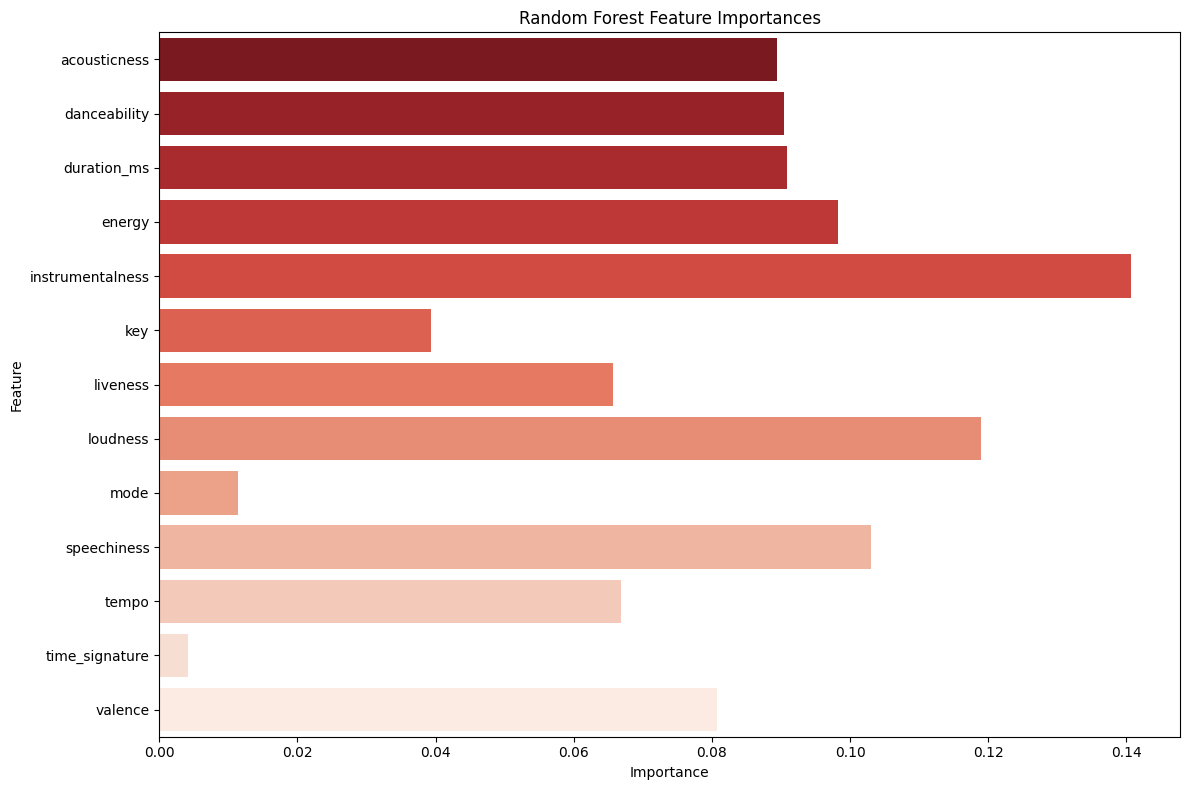

In [ ]:

# Visualize feature importances for Random Forest
plt.figure(figsize=(12, 8))
rf_feature_importances = best_rf_model.named_steps['rf'].feature_importances_
rf_features = X.columns
sns.barplot(x=rf_feature_importances, y=rf_features, palette='Reds_r')  # Use Reds_r for a red color palette
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')

plt.tight_layout()
plt.show()



In [ ]:
# Function for model evaluation with enhanced visualization
from sklearn.neural_network import MLPClassifier

# Construct a pipeline with preprocessing and MLPClassifier
mlp_pipeline_proba = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('mlp', MLPClassifier(random_state=42))
])

# Define the parameter grid for grid search for MLP with probability estimates
mlp_param_grid = {
    'mlp__hidden_layer_sizes': [(100,), (50, 50), (20, 20, 20)],
    'mlp__activation': ['relu', 'tanh'],
    'mlp__alpha': [0.0001, 0.001, 0.01],
}

# Initialize GridSearchCV with cross-validation for MLP with probability estimates
mlp_grid_search_proba = GridSearchCV(mlp_pipeline_proba, mlp_param_grid, cv=5, n_jobs=-1)
mlp_grid_search_proba.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('mlp',
                                        MLPClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'mlp__activation': ['relu', 'tanh'],
                         'mlp__alpha': [0.0001, 0.001, 0.01],
                         'mlp__hidden_layer_sizes': [(100,), (50, 50),
                                                     (20, 20, 20)]})

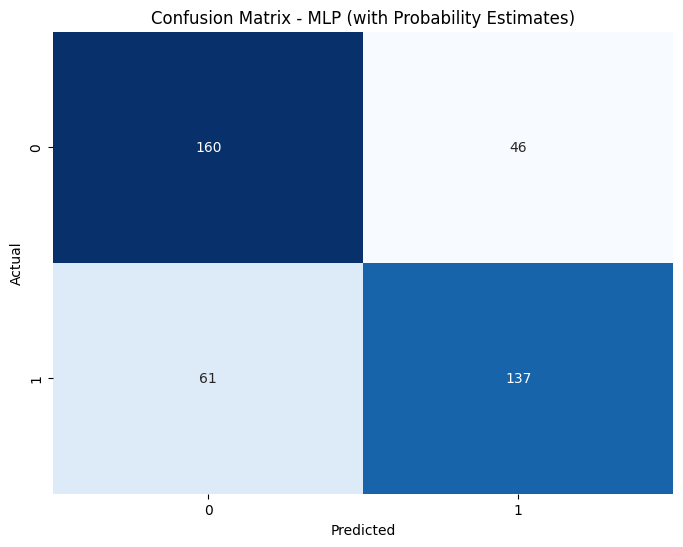

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions
y_pred = mlp_grid_search_proba.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - MLP (with Probability Estimates)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


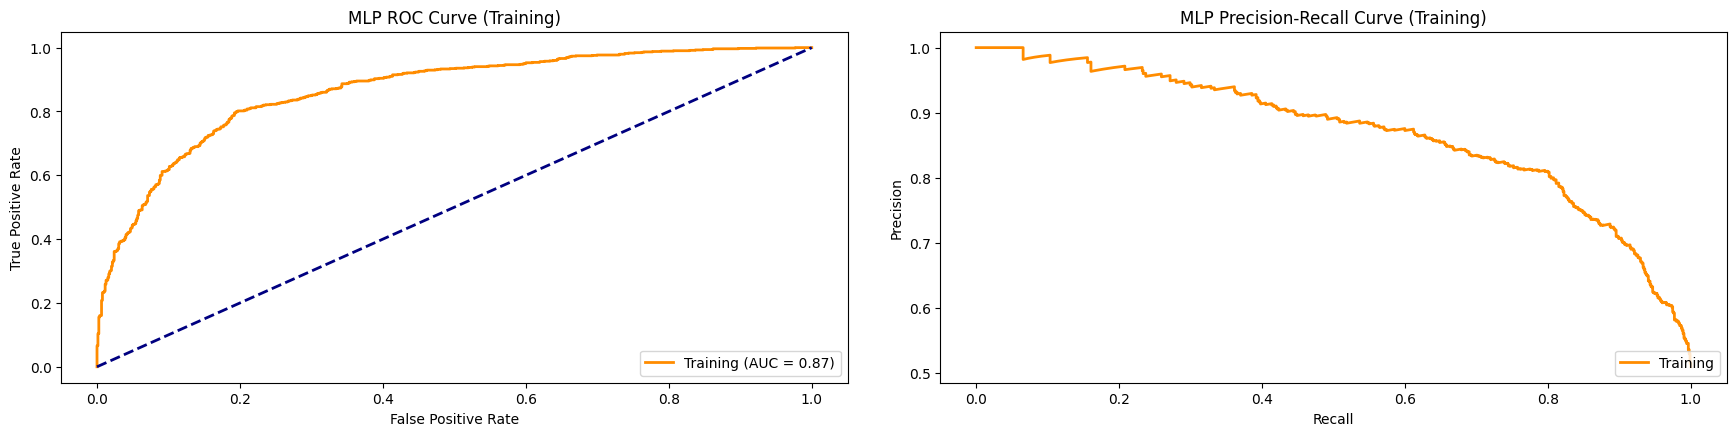

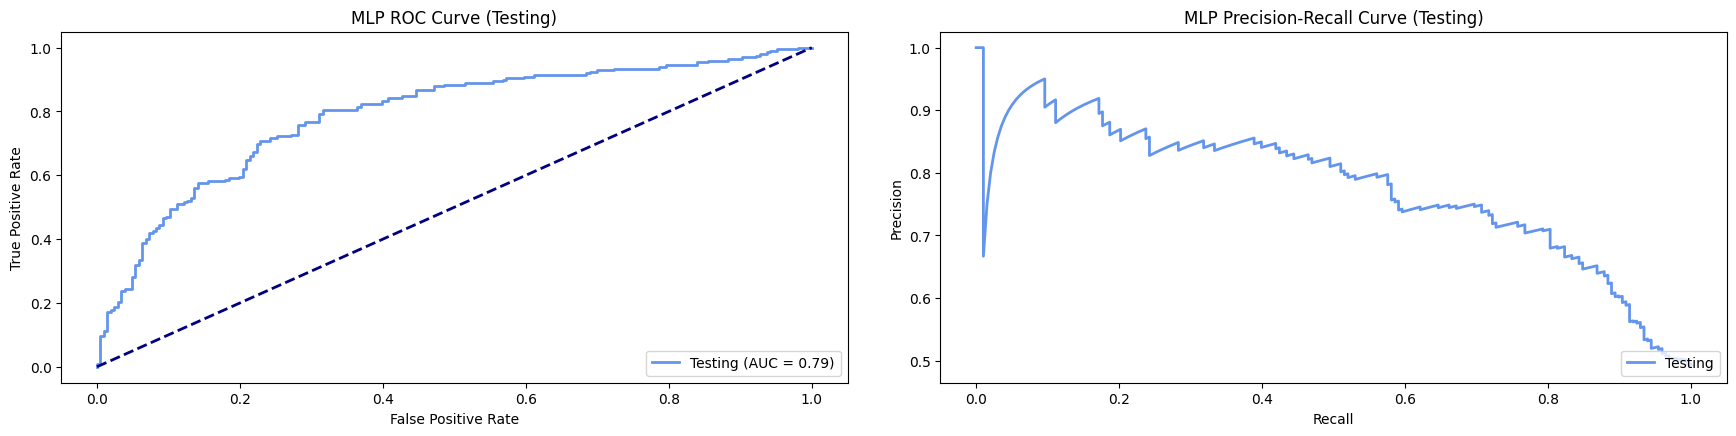

MLP:
Accuracy: 0.7351485148514851
Confusion Matrix:
[[160  46]
 [ 61 137]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.78      0.75       206
           1       0.75      0.69      0.72       198

    accuracy                           0.74       404
   macro avg       0.74      0.73      0.73       404
weighted avg       0.74      0.74      0.73       404



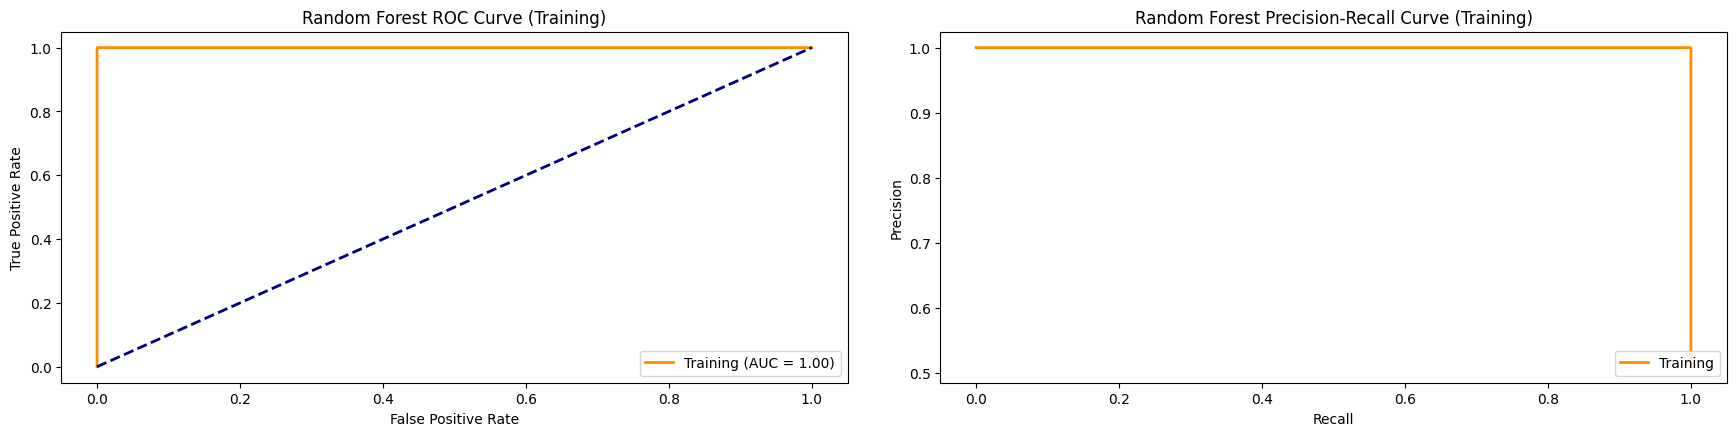

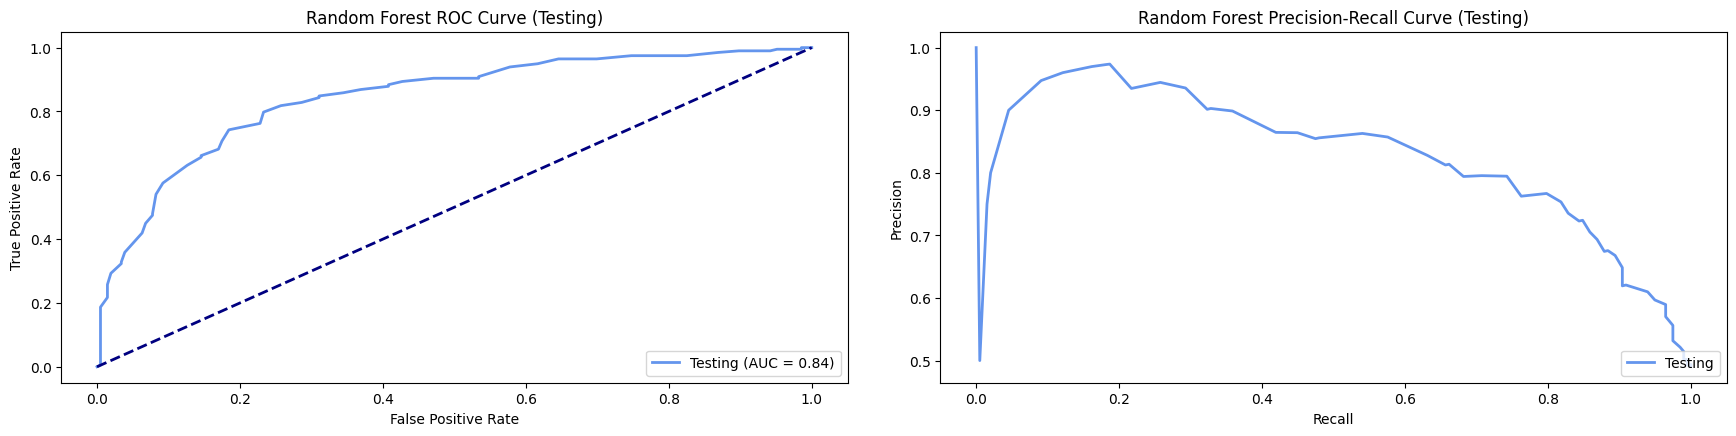

Random Forest:
Accuracy: 0.7821782178217822
Confusion Matrix:
[[158  48]
 [ 40 158]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       206
           1       0.77      0.80      0.78       198

    accuracy                           0.78       404
   macro avg       0.78      0.78      0.78       404
weighted avg       0.78      0.78      0.78       404



In [ ]:



# Get the best MLP model with probability estimates from grid search
best_mlp_model_proba = mlp_grid_search_proba.best_estimator_
def evaluate_model_visual(model, X_train, y_train, X_test, y_test, model_name):
    # Predictions on the training set
    train_predictions = model.predict(X_train)

    try:
        train_probabilities = model.predict_proba(X_train)[:, 1]
        fpr_train, tpr_train, _ = roc_curve(y_train, train_probabilities)
        precision_train, recall_train, _ = precision_recall_curve(y_train, train_probabilities)

        # Plot ROC curve
        # Plot ROC curve
        plt.figure(figsize=(18, 5))  # Increase the width to provide more space

# Subplot for ROC curve
        plt.subplot(1, 2, 1)
        plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='Training (AUC = {:.2f})'.format(auc(fpr_train, tpr_train)))
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model_name} ROC Curve (Training)')
        plt.legend(loc="lower right")

        # Subplot for Precision-Recall curve
        plt.subplot(1, 2, 2)
        plt.plot(recall_train, precision_train, color='darkorange', lw=2, label='Training')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'{model_name} Precision-Recall Curve (Training)')
        plt.legend(loc="lower right")

        plt.tight_layout(pad=3.0)  # Add space between subplots
        plt.show()


    except AttributeError:
        print(f"{model_name} does not support predict_proba. Skipping ROC and Precision-Recall curves for training.")

    # Predictions on the test set
    test_predictions = model.predict(X_test)

    try:
        test_probabilities = model.predict_proba(X_test)[:, 1]
        fpr_test, tpr_test, _ = roc_curve(y_test, test_probabilities)
        precision_test, recall_test, _ = precision_recall_curve(y_test, test_probabilities)

        # Plot ROC curve
        plt.figure(figsize=(18, 5))

        plt.subplot(1, 2, 1)
        plt.plot(fpr_test, tpr_test, color='cornflowerblue', lw=2, label='Testing (AUC = {:.2f})'.format(auc(fpr_test, tpr_test)))
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model_name} ROC Curve (Testing)')
        plt.legend(loc="lower right")

        # Plot Precision-Recall curve
        plt.subplot(1, 2, 2)
        plt.plot(recall_test, precision_test, color='cornflowerblue', lw=2, label='Testing')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'{model_name} Precision-Recall Curve (Testing)')
        plt.legend(loc="lower right")
    except AttributeError:
        print(f"{model_name} does not support predict_proba. Skipping ROC and Precision-Recall curves for testing.")

    plt.tight_layout(pad=3.0)  # Add space between subplots
    plt.show()

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, test_predictions)

    # Print evaluation metrics
    accuracy = accuracy_score(y_test, test_predictions)
    class_report = classification_report(y_test, test_predictions)

    print(f"{model_name}:")
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{class_report}")

evaluate_model_visual(best_mlp_model_proba, X_train, y_train, X_test, y_test, 'MLP')

# Visualize the results with probability estimates for Random Forest
evaluate_model_visual(best_rf_model, X_train, y_train, X_test, y_test, 'Random Forest')







